# Problem Statement - Churn on telicom dataset
## The dataset contains - 21 columns and 7044 rows including header. 
## Telicom company of this dataset needs to find the reason of customer churning due to various reason and needs to stratergically desinged its product offering so as to customer doesn't leave the operator.

In [1]:
# Importing Libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading data 
telco = pd.read_csv("Telco.csv")

In [3]:
# Analysing the top 5 data of each column.
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Check the datatype of all variables "Columns"
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Exploratory Data Analysis and Data Cleaning
## Basic Information can be derived and can be concluded after EDA.
## The dataset contains suffienct information as below
## 1. Types of services use.(Online security,Online Backup Streming etc)
## 2. Tenure in keeping the services in months (Assuming as data dictonary not provided)
## 3. Monthly and total charges customer paying.
## 4. Partner and dependent impact on churn ?
## 5. Target Variable - Churn ("If customer have been retained or not")


In [5]:
# As TotalCharges is having incorrect datatype , we need to change to numeric
telco['TotalCharges'] = pd.to_numeric(telco['TotalCharges'],errors='coerce')

In [6]:
# Handling Missing Value in dataset 

## Null value found only in Total charges - We have the monthly charges and tenure , we can calculate the total charges
## replace the values with mean.

In [7]:
telco.isnull().sum()
telco[telco['TotalCharges'].isna()]
mean_value = telco['TotalCharges'].mean()
# replace missing values with the mean value
telco['TotalCharges'].fillna(mean_value, inplace=True)
# Droping insignificant columns from table 
# customerID
telco = telco.drop(columns = 'customerID')

In [8]:
def Print_unique_col_values(df):
    for column in telco:
        if telco[column].dtypes == 'object':
            print(f'{column} : {telco[column].unique()}')
Print_unique_col_values(telco)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [9]:
# Replacing values 

telco.replace('No internet service','No',inplace=True)
telco.replace('No phone service','No',inplace=True)

# Also replacing data with 1 and 0
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    telco[col].replace({'Yes': 1,'No': 0},inplace=True)
    

telco['gender'].replace({'Female':1,'Male':0},inplace=True)


telco2 = pd.get_dummies(data=telco, columns=['InternetService','Contract','PaymentMethod'])
telco2.columns


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [10]:
telco.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,7043.0,0.495244,0.500013,0.00,0.000,0.00,1.00,1.00
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.000,0.00,0.00,1.00
Partner,7043.0,0.483033,0.499748,0.00,0.000,0.00,1.00,1.00
Dependents,7043.0,0.299588,0.458110,0.00,0.000,0.00,1.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.00,55.00,72.00
PhoneService,7043.0,0.903166,0.295752,0.00,1.000,1.00,1.00,1.00
MultipleLines,7043.0,0.421837,0.493888,0.00,0.000,0.00,1.00,1.00
OnlineSecurity,7043.0,0.286668,0.452237,0.00,0.000,0.00,1.00,1.00
OnlineBackup,7043.0,0.344881,0.475363,0.00,0.000,0.00,1.00,1.00
DeviceProtection,7043.0,0.343888,0.475038,0.00,0.000,0.00,1.00,1.00


# Descriptive Statistics 

## 1. Tenure - Dataset has varied tenure from min -1 to max - 72 months. 
## 2. Monthly charges - min is 18 and  max is 118 with standard deviation of ~$30. 

In [11]:
telco.groupby('Churn')['tenure'].quantile([.50,.75,.90,.95])
# Insight - 50% customer churn within 10 Months. 
# customer decline after 5 months of using serices which is concerning to telco company 

Churn      
0      0.50    38.0
       0.75    61.0
       0.90    71.0
       0.95    72.0
1      0.50    10.0
       0.75    29.0
       0.90    51.0
       0.95    60.0
Name: tenure, dtype: float64

In [12]:
telco.groupby('Churn')['tenure'].mean()

Churn
0    37.569965
1    17.979133
Name: tenure, dtype: float64

# Exploratory Data Analysis

## Tenure to check its impact on churn and how long customers stick with the telicom operator
## Creating bins for tenure and adding new columns tenure_group 

Text(0.5, 1.0, 'Churn Rate')

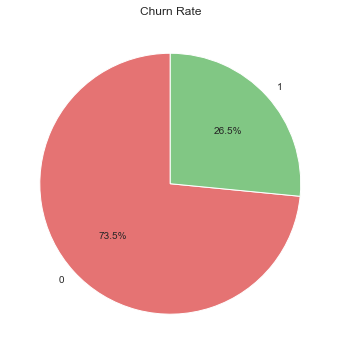

In [13]:
churn_count = telco['Churn'].value_counts()
sns.set_style('whitegrid')
plt.figure(figsize=(6,6))
plt.pie(churn_count, labels=churn_count.index, autopct='%1.1f%%', startangle=90, colors=['#E57373', '#81C784'])
plt.title('Churn Rate')

In [14]:
# 26.5% of customers are in churn and have stopped using the services.

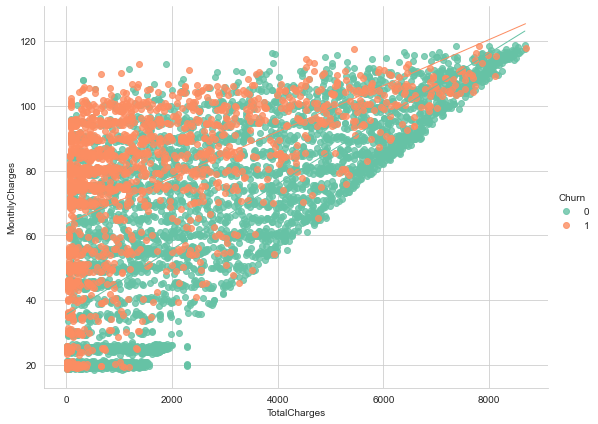

In [15]:
# Check the distribution of Total Charges 

#telco[['MonthlyCharges','TotalCharges']].plot.scatter(x='MonthlyCharges',y='TotalCharges')

sns.lmplot(data=telco, x='TotalCharges', y='MonthlyCharges', hue='Churn', 
           ci=None, height=6, aspect=1.3, palette='Set2', line_kws={'linewidth': 1})
sns.despine()
plt.show()
# Strangely customer with high bills are not churning much

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

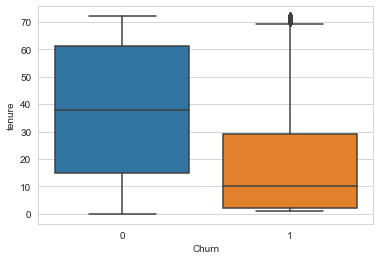

In [16]:
sns.boxplot(x=telco.Churn,y=telco.tenure)
# data has been scewed in tenure with reference to churn.

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

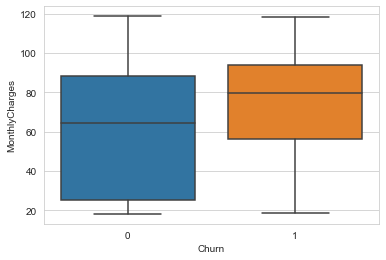

In [17]:
sns.boxplot(x=telco.Churn,y=telco.MonthlyCharges)
# Disrtibution of churn data set using monthly charges. No outliers are present.

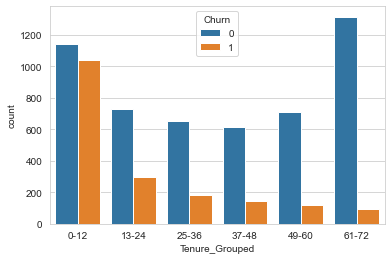

In [18]:
tenurebins = [0, 12, 24, 36, 48, 60, 72]
labels = ['0-12', '13-24', '25-36', '37-48', '49-60', '61-72']
telco['Tenure_Grouped'] = pd.cut(telco['tenure'], bins=tenurebins, labels=labels)

sns.countplot(data = telco, x = 'Tenure_Grouped', hue = 'Churn')
plt.show()

# Above Bar chart represents - customer leave maximum from 1 to 12 months during this period. 
## As our target variable is Churn all EDA and other analysis will be based on which variables is influencing customers to not churn with telicom operator. 

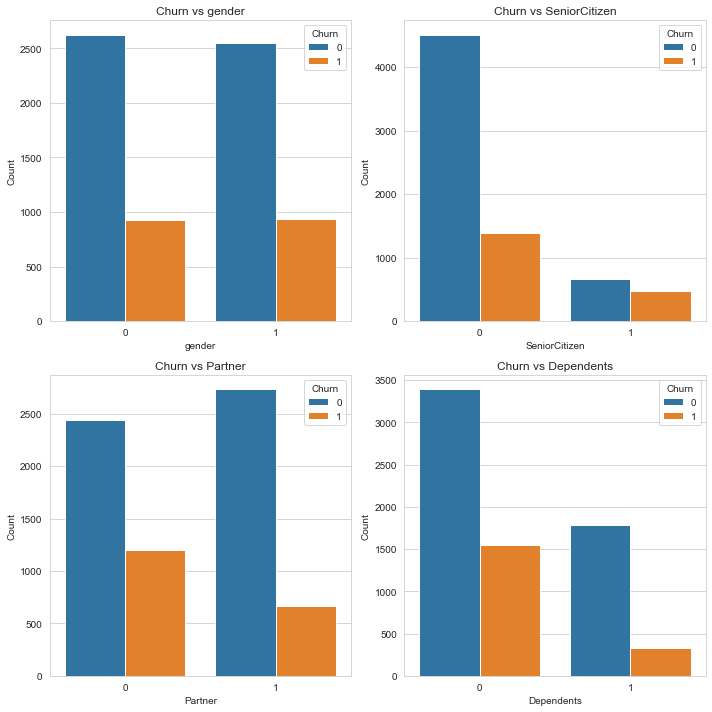

In [19]:
ED1 = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    if i < len(ED1):
        sns.countplot(data=telco, x=ED1[i], hue='Churn', ax=ax)
        ax.set_title(f'Churn vs {ED1[i]}')
        ax.set_xlabel(ED1[i])
        ax.set_ylabel('Count')
        
plt.tight_layout()
plt.show()

# Insights from above Bar Graph - ED1
## 1. Gender doesnt have any significant in churing.
## 2. Senior Citizen doesnt churn much as they dont want to change from regular services. 
## 3.Youngers members without Partners and no dependents tends to churn more than others. 


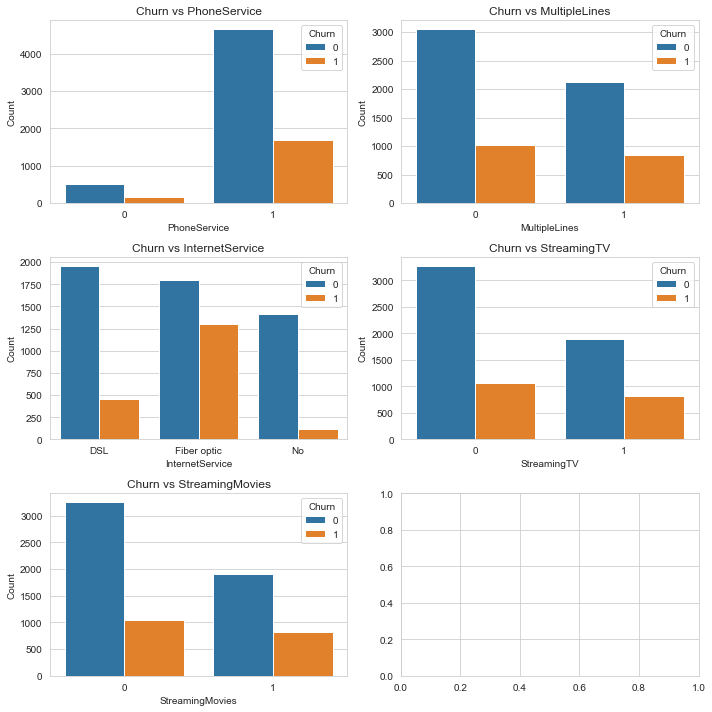

In [20]:
# Lets check for others variable impact on churn

ED2 = telco[['Churn', 'PhoneService', 'MultipleLines', 'InternetService','StreamingTV', 'StreamingMovies']]

#Keeeping churn as target column fix for our graph
cols = ED2.columns[1:]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10,10))

for i, ax in enumerate(axes.flat):
    if i < len(cols):
        sns.countplot(data=telco, x=cols[i], hue='Churn', ax=ax)
        ax.set_title(f'Churn vs {cols[i]}')
        ax.set_xlabel(cols[i])
        ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


# Insights from above Bar Graph - ED2
## 1. Phone services are major reason for shifing to other operators. 
## 2. Interet services - Customers who has fiber optic tends to churn. 

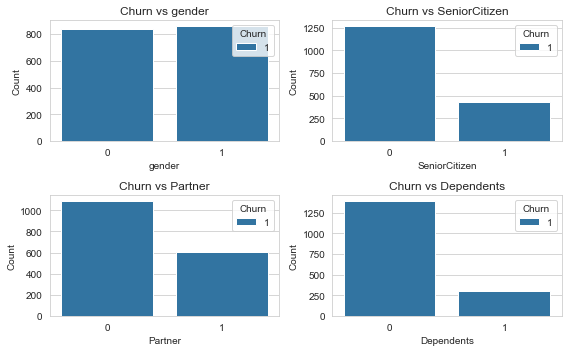

In [21]:
# Cheking for major reason - Phone service which impact customer

phone_churn = telco[(telco['PhoneService']== 1) & (telco['Churn']== 1)]

cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 5))

for i, ax in enumerate(axes.flat):
    if i < len(cols):
        sns.countplot(data=phone_churn, x=cols[i], hue='Churn', ax=ax)
        ax.set_title(f'Churn vs {cols[i]}')
        ax.set_xlabel(cols[i])
        ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

## From Above EDA - we can conclude that customers who are churning are younger clients with no partners and dependents.
## Looks like clients are more experimenting.

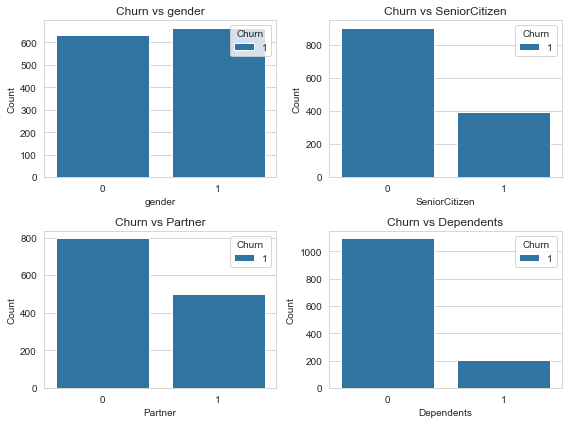

In [22]:
# Cheking for another reason - Fiber optics which impact customer

fo_churn = telco[(telco['InternetService']=='Fiber optic') & (telco['Churn'] == 1)]
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))
cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

for k, ax in enumerate(axes.flat):
    if k < len(cols):
        sns.countplot(data=fo_churn, x=cols[k], hue='Churn', ax=ax)
        ax.set_title(f'Churn vs {cols[k]}')
        ax.set_xlabel(cols[k])
        ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

## From Above EDA - we can conclude that customers who are churning are younger clients with no partners and dependents.
## Looks like our assumption for phone service and Fiber optics stands confirm. 

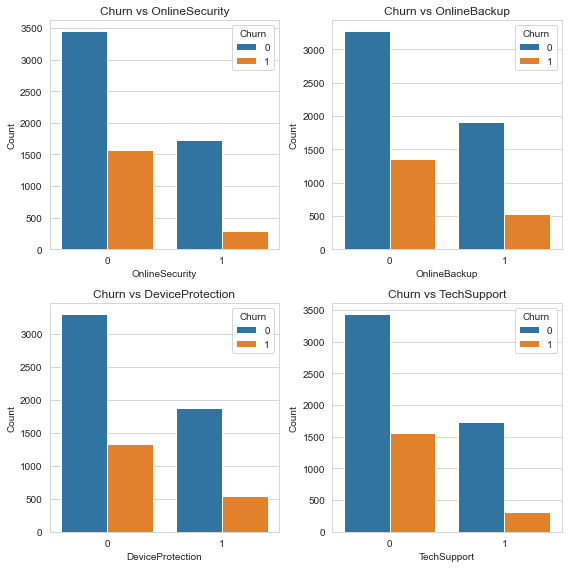

In [23]:
# Lets do Bivariate analysis using services Vs Target Variable - "Churn"

services = telco[['Churn', 'OnlineSecurity', 'OnlineBackup','DeviceProtection', 'TechSupport']]
cols = services.columns[1:]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,8))

for i, ax in enumerate(axes.flat):
    if i < len(cols):
        sns.countplot(data=services, x=cols[i], hue='Churn', ax=ax)
        ax.set_title(f'Churn vs {cols[i]}')
        ax.set_xlabel(cols[i])
        ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

## Insight from above EDA - Customers doesnt have any of the above services tends to churn more. 

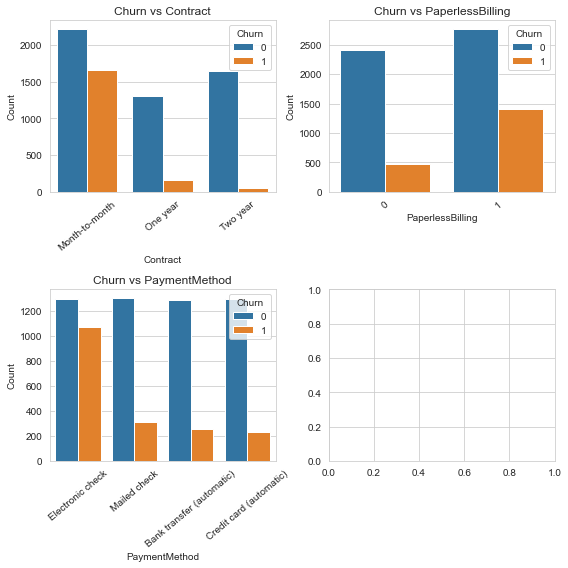

In [24]:
# Contract Type and payment related insight 

payment = telco[['Churn', 'Contract', 'PaperlessBilling','PaymentMethod']]
cols = payment.columns[1:]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,8))

for i, ax in enumerate(axes.flat):
    if i < len(cols):
        sns.countplot(data=payment, x=cols[i], hue='Churn', ax=ax)
        ax.set_title(f'Churn vs {cols[i]}')
        ax.set_xlabel(cols[i])
        ax.set_ylabel('Count')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40)

plt.tight_layout()
plt.show()

## Insight - Monthly contract with paperless billing and more online payment method turns to churn more. 

In [25]:
#Model preprocessing for Decision tree
# Removing more columns based on assessment brief. 
modeltelco = telco
modeltelco = modeltelco.drop(columns = 'MonthlyCharges')
modeltelco = modeltelco.drop(columns = 'OnlineSecurity')
modeltelco = modeltelco.drop(columns = 'StreamingTV')
modeltelco = modeltelco.drop(columns = 'InternetService')
modeltelco = modeltelco.drop(columns = 'Partner')
modeltelco = modeltelco.drop(columns = 'Tenure_Grouped')
modeltelco.head(2)

,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,OnlineBackup,DeviceProtection,TechSupport,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,1,0,0,1,0,0,1,0,0,0,Month-to-month,1,Electronic check,29.85,0
1,0,0,0,34,1,0,0,1,0,0,One year,0,Mailed check,1889.50,0


In [26]:
modeltelco.groupby('Churn')['Churn'].count()

Churn
0    5174
1    1869
Name: Churn, dtype: int64

In [27]:
# scaling modeltelco
scale = ['tenure','TotalCharges']
modeltelco = pd.get_dummies(data=modeltelco, columns=['Contract','PaymentMethod'])
scaler = MinMaxScaler()
modeltelco[scale] = scaler.fit_transform(modeltelco[scale])


In [28]:
A = modeltelco.drop('Churn',axis='columns')
b = modeltelco['Churn']
A_train, A_test, b_train, b_test = train_test_split(A,b,test_size=0.25,random_state=3)

In [29]:
dtree1 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dtree1.fit(A_train,b_train)
b_predict = dtree1.predict(A_test)

[[1071  233]
 [ 227  230]]
0.7387847813742192
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      1304
           1       0.50      0.50      0.50       457

    accuracy                           0.74      1761
   macro avg       0.66      0.66      0.66      1761
weighted avg       0.74      0.74      0.74      1761



Text(70.0, 0.5, 'Truth')

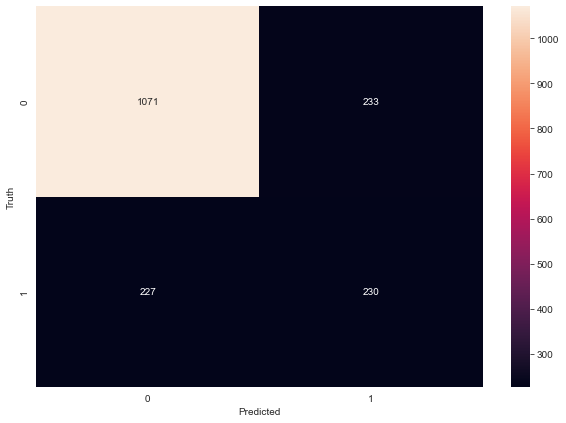

In [30]:
b_pred = dtree1.predict(A_test)
cm1 = confusion_matrix(b_test, b_predict)
print(cm1)
acc_decisiontree1 = accuracy_score(b_test, b_predict)
print(acc_decisiontree1)
print(metrics.classification_report(b_test, b_pred))
plt.figure(figsize = (10,7))
sns.heatmap(cm1, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<AxesSubplot:>

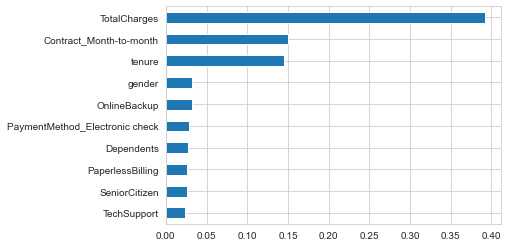

In [31]:
importances = dtree1.feature_importances_
weights1 = pd.Series(importances,
                 index=A.columns.values)
weights1.sort_values()[-10:].plot(kind = 'barh')

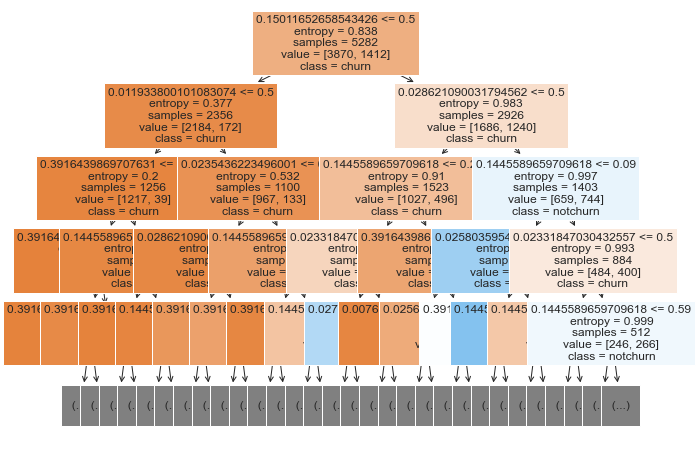

In [32]:
modeltelco['Churn'].replace({1:'churn',0:'notchurn'},inplace=True)
plt.figure(figsize=(10,8))
plot_tree(dtree1, feature_names= importances, class_names= ['churn','notchurn'], 
          filled=True,max_depth=4,fontsize=12)
plt.show()

In [33]:
# scaling telco2
scale = ['tenure','MonthlyCharges','TotalCharges']

scaler = MinMaxScaler()
telco2[scale] = scaler.fit_transform(telco2[scale])


In [34]:
X = telco2.drop('Churn',axis='columns')
y = telco2['Churn']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=3)

In [35]:
dtree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dtree.fit(X_train,y_train)
y_predict = dtree.predict(X_test)

[[1061  243]
 [ 233  224]]
0.7296990346394094
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1304
           1       0.48      0.49      0.48       457

    accuracy                           0.73      1761
   macro avg       0.65      0.65      0.65      1761
weighted avg       0.73      0.73      0.73      1761



Text(34.0, 0.5, 'Truth')

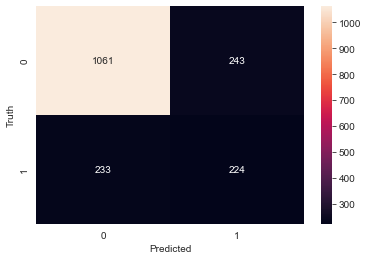

In [36]:
y_pred = dtree.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
print(cm)
acc_decisiontree = accuracy_score(y_test, y_predict)
print(acc_decisiontree)
print(metrics.classification_report(y_test, y_pred))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<AxesSubplot:>

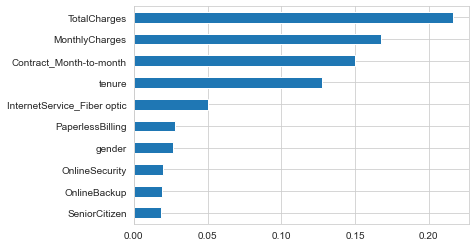

In [37]:
importances1 = dtree.feature_importances_
weights1 = pd.Series(importances1,
                 index=X.columns.values)
weights1.sort_values()[-10:].plot(kind = 'barh')

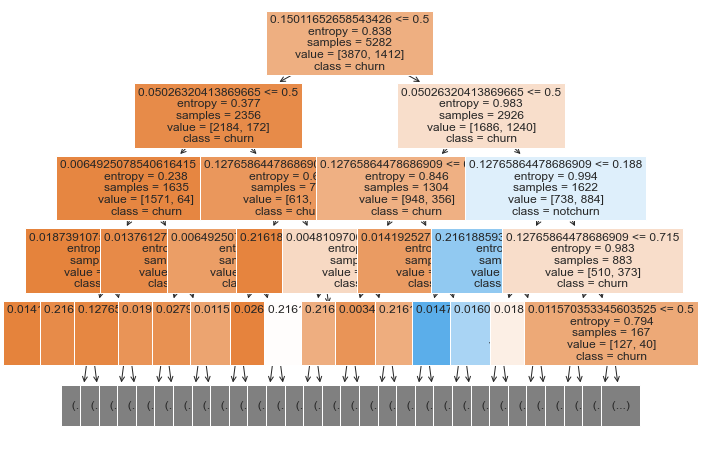

In [38]:
telco2['Churn'].replace({1:'churn',0:'notchurn'},inplace=True)
plt.figure(figsize=(10,8))
plot_tree(dtree, feature_names= importances1, class_names= ['churn','notchurn'], 
          filled=True,max_depth=4,fontsize=12)
plt.show()